#Visualización de datos

###Limpieza de datos con Python y Pandas

##Importamos librerías.

In [99]:
#Procesamiento
import pandas as pd
import numpy as np

#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

##Cargamos el dataset.

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Mounted at /content/drive

In [101]:
ruta = '/content/drive/MyDrive/Hackaton/Dataset_Talento.csv'
dataSet = pd.read_csv(ruta)
dataSet

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,Noche,OP_16,M_8,P_14,74.200401,NaN,45.209387,106.356684,No,NaN,108,3,87.021704,13.131580,0,1,NaN
1,2023-01-01 01:00:00,Mañana,OP_18,M_8,P_12,85.886727,0.481294,52.623286,106.147220,Sí,Eléctrico,86,2,81.200758,13.348221,0,0,NaN
2,2023-01-01 02:00:00,Noche,OP_5,M_7,P_14,81.293588,0.446638,48.538203,122.517733,No,NaN,103,0,79.104477,15.461715,3,0,Operación normal
3,2023-01-01 03:00:00,Noche,OP_4,M_6,P_15,75.697975,0.576969,55.597781,123.641235,No,NaN,104,2,84.176537,16.156453,4,0,NaN
4,2023-01-01 04:00:00,Mañana,OP_13,M_6,P_7,69.887504,0.716240,63.837428,126.276992,No,NaN,119,1,93.535084,12.573939,0,0,Operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-09-07 19:00:00,Mañana,OP_7,M_9,P_2,69.566198,0.359394,31.452299,110.456904,No,NaN,85,6,83.359399,17.467713,1,0,NaN
5996,2023-09-07 20:00:00,Tarde,OP_16,M_9,P_1,72.509325,0.387216,45.429609,145.575235,No,NaN,109,4,87.847138,11.850616,0,0,NaN
5997,2023-09-07 21:00:00,Noche,OP_3,M_7,P_11,72.452851,0.551448,27.774960,74.620786,No,NaN,109,0,NaN,NaN,1,1,Revisar calibración
5998,2023-09-07 22:00:00,Tarde,OP_7,M_6,P_1,74.236404,0.429883,41.528769,111.656062,No,NaN,101,3,87.225639,17.073040,0,0,NaN


#Análisis exploratorio de datos

Tamaño del data frame e información de las columnas del data frame.

In [102]:
dataSet.shape

(6000, 18)

In [103]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  para

# 2 Limpieza

### 2.1 Datos faltantes

In [104]:
#Valores nulos por columna
missing_values = dataSet.isna().sum()
missing_values

,0
timestamp,0
turno,0
operador_id,0
maquina_id,0
producto_id,0
temperatura,180
vibración,180
humedad,180
tiempo_ciclo,180
fallo_detectado,0


In [105]:
total_cells = np.prod(dataSet.shape)
total_cells

np.int64(108000)

In [106]:
total_missing = missing_values.sum()
total_missing

np.int64(10707)

In [107]:
(total_missing/total_cells) * 100

np.float64(9.913888888888888)

<Axes: >

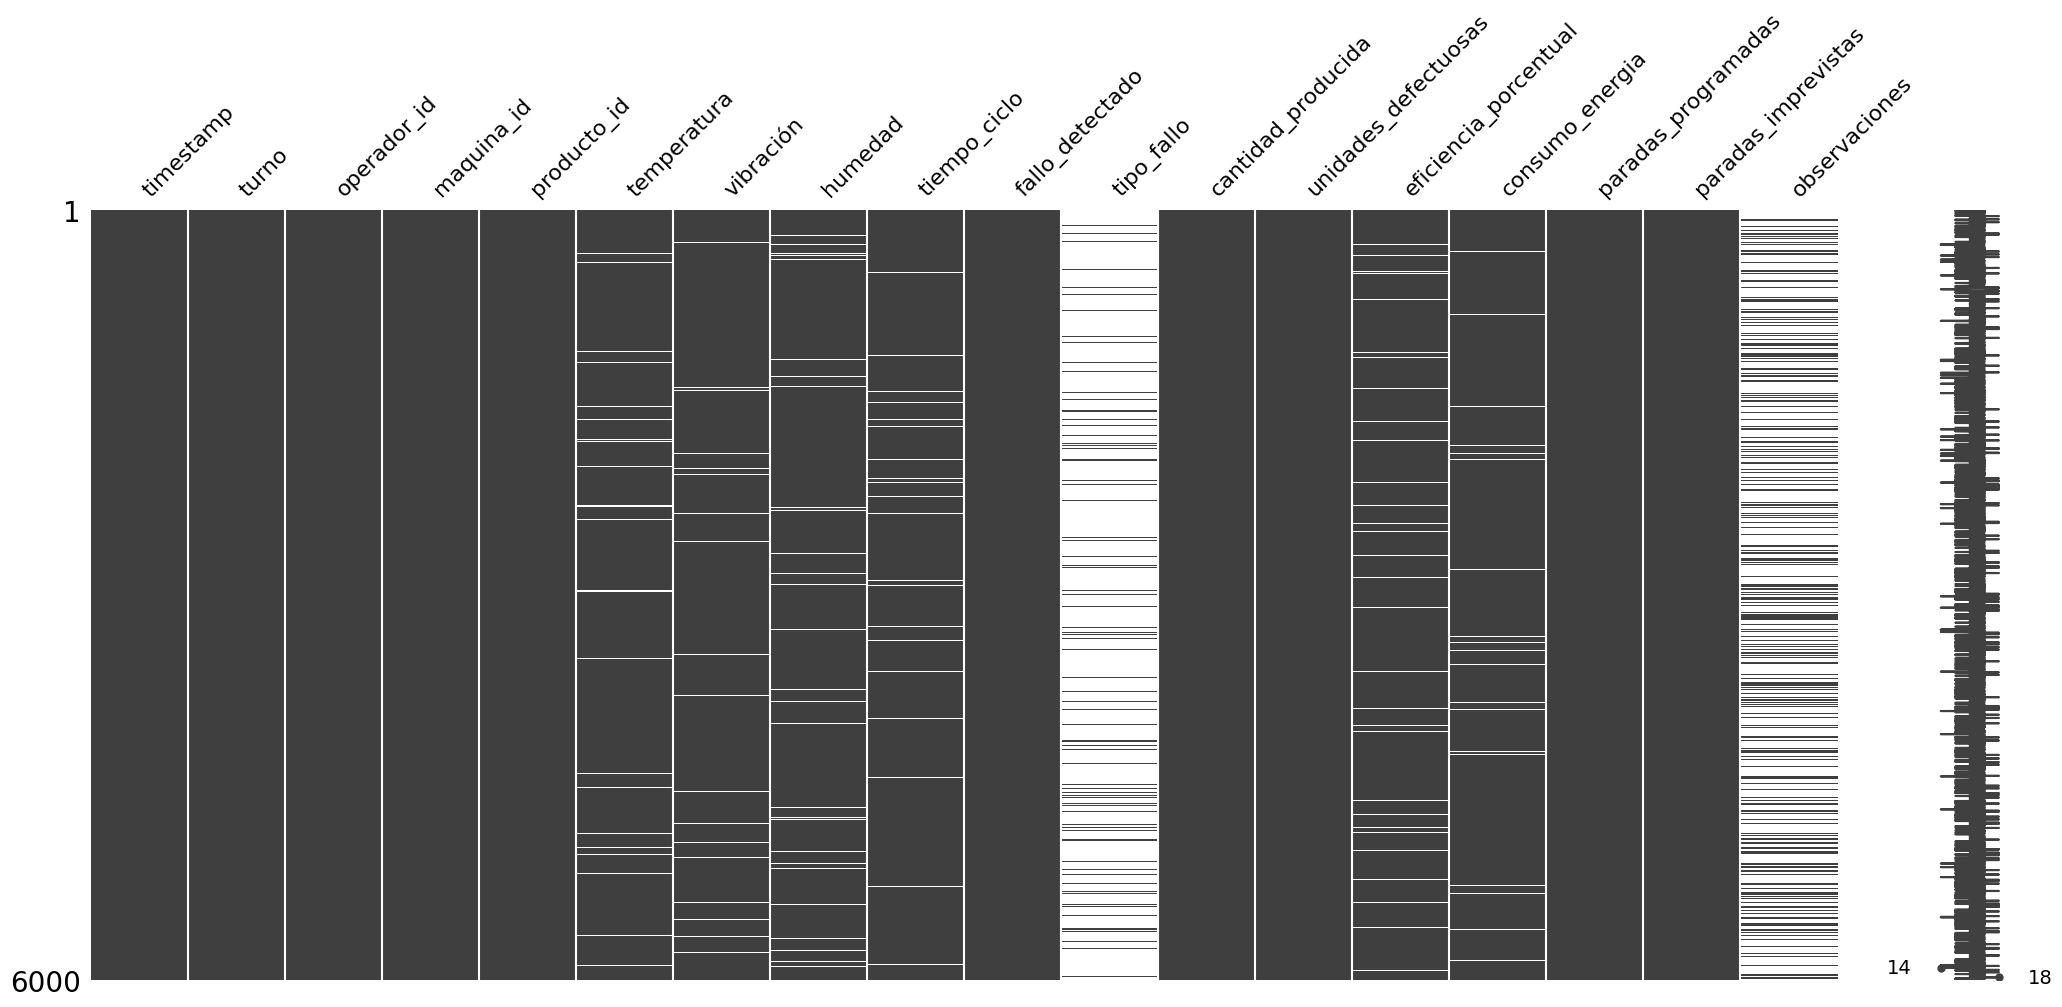

In [108]:
msno.matrix(dataSet)

###¿Podemos eliminar los datos por que representan el 9.913% de los datos?**texto en negrita**

Revisamos tipo_fallo y obsevaciones

In [109]:
dataSet.tipo_fallo.value_counts()

,count
tipo_fallo,
Mecánico,294
Eléctrico,192
Otro,113


In [110]:
dataSet.observaciones.value_counts()

,count
observaciones,
Operación normal,863
Revisar calibración,596
Ruido inusual,315


In [111]:
dataSet.tipo_fallo.value_counts().sum()

np.int64(599)

In [112]:
dataSet.observaciones.value_counts().sum()

np.int64(1774)

In [113]:
dataSet['tipo_fallo'] = dataSet['tipo_fallo'].fillna('No clasificado')

In [114]:
dataSet['observaciones'] = dataSet['observaciones'].fillna('Sin Observaciones')

In [115]:
dataSet.tipo_fallo.isna().sum()

np.int64(0)

Vamos a promediar los datos numéricos en cada columna que albergué datos numéricos y añadiremos ese dato a los missing values.

In [116]:
promedios = dataSet.mean(numeric_only=True)
print(promedios)

temperatura               74.980189
vibración                  0.502242
humedad                   44.964716
tiempo_ciclo             119.912532
cantidad_producida        99.978833
unidades_defectuosas       2.001167
eficiencia_porcentual     84.972214
consumo_energia           15.104971
paradas_programadas        0.996500
paradas_imprevistas        0.497667
dtype: float64


Asignamos a las casillas n/a el dato promedio.

In [117]:
dataSet = dataSet.fillna(dataSet.mean(numeric_only=True))

Revisamos la limpieza del dataSet de nuevo

In [118]:
#Valores nulos por columna
missing_values = dataSet.isna().sum()
missing_values

,0
timestamp,0
turno,0
operador_id,0
maquina_id,0
producto_id,0
temperatura,0
vibración,0
humedad,0
tiempo_ciclo,0
fallo_detectado,0


###2.2 Columnas irrelevates

In [1]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = [
    "timestamp",
    "turno",
    "operador_id",
    "maquina_id",
    "producto_id",
    "temperatura",
    "vibración",
    "humedad",
    "tiempo_ciclo",
    "fallo_detectado",
    "tipo_fallo",
    "cantidad_producida",
    "unidades_defectuosas",
    "eficiencia_porcentual",
    "consumo_energia",
    "paradas_programadas",
    "paradas_imprevistas",
    "observaciones"
]

for col in cols_cat:
  print(f'Columna {col}: {dataSet[col].nunique()} subniveles')

NameError: name 'dataSet' is not defined

Todas las columnas son relevantes repecto a sus variables.

###4.3 Outliers en las variables

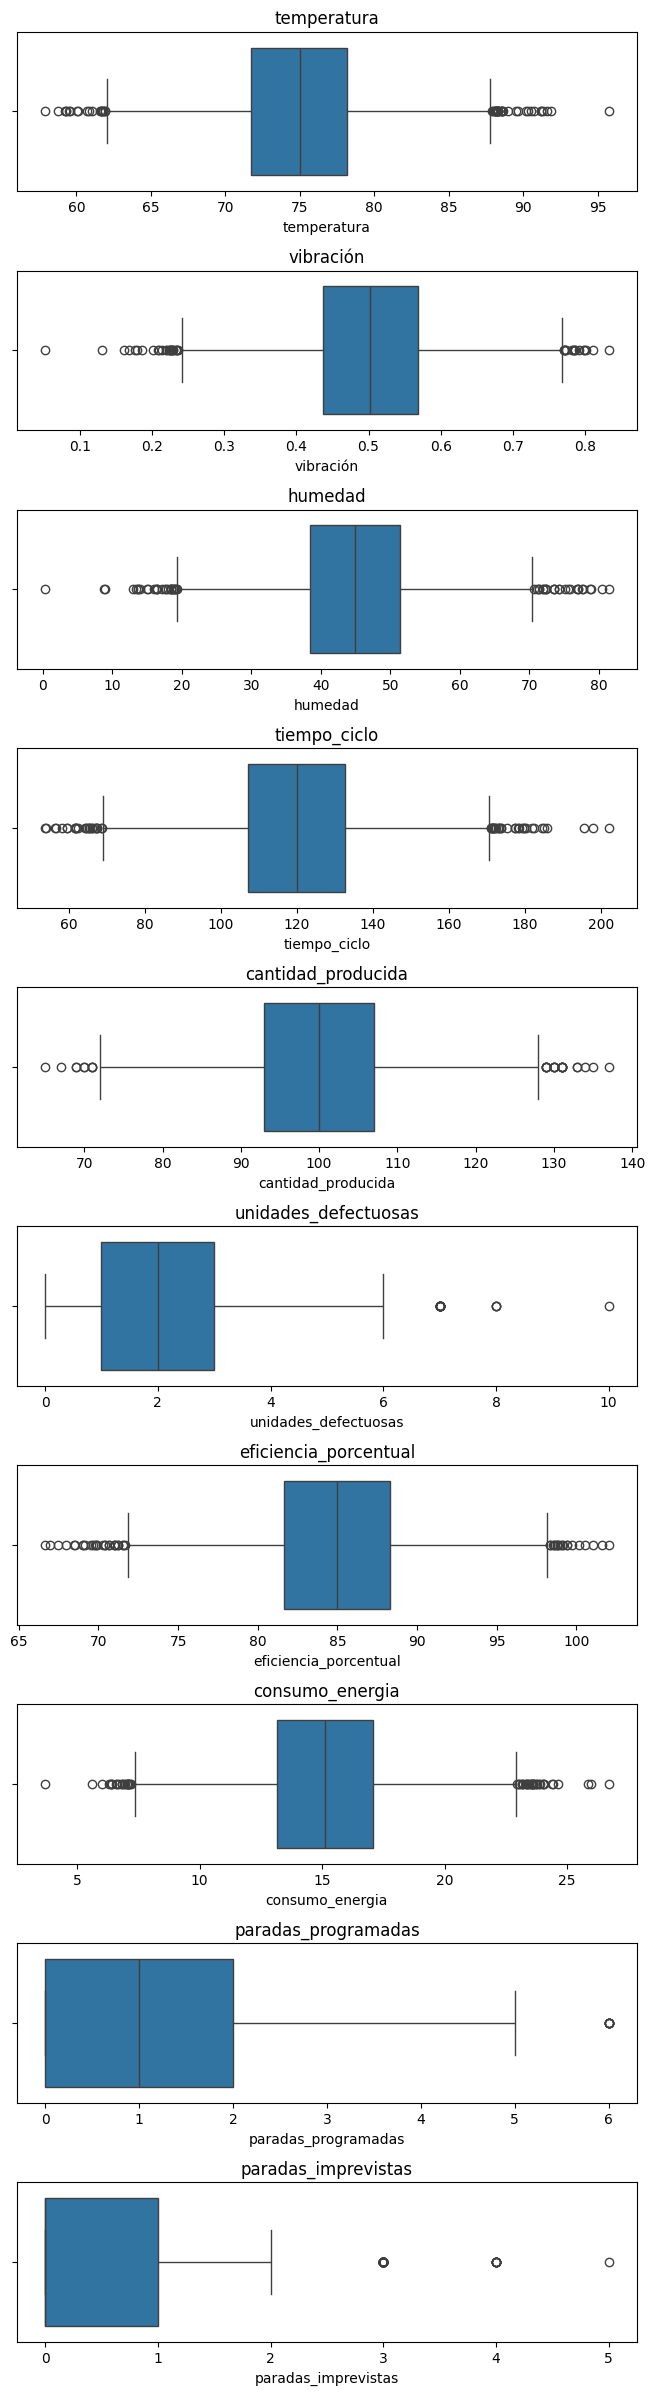

In [120]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = [
    "temperatura",
    "vibración",
    "humedad",
    "tiempo_ciclo",
    "cantidad_producida",
    "unidades_defectuosas",
    "eficiencia_porcentual",
    "consumo_energia",
    "paradas_programadas",
    "paradas_imprevistas",
]

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dataSet, ax=ax[i])
    ax[i].set_title(col)

La única variable que tiene valores outliers a mirar es la eficiencia_porcentual, ya que hay valores que superan el 100%

In [121]:
valores_mayores_100 = dataSet[dataSet["eficiencia_porcentual"] > 100]
print(valores_mayores_100[["eficiencia_porcentual"]])

      eficiencia_porcentual
361              101.573110
830              100.179076
2370             102.024829
2489             101.016465
5150             100.520575


Vale la pena mantener los valores. En algunas producciones industriales existen métodos de evaluación de la eficiencia relacionados con un target, esto aveces permite que el target sea cumplido y superado. Eficiencia (%) = (Producción real / Producción esperada) × 100

Los outliers en los demás campos son lo suficientemente creibles como para mantenerlos; hay valores agrupados y no existen valores fuera de los rangos creibles.

Ahora revisamos las variables categóricas.

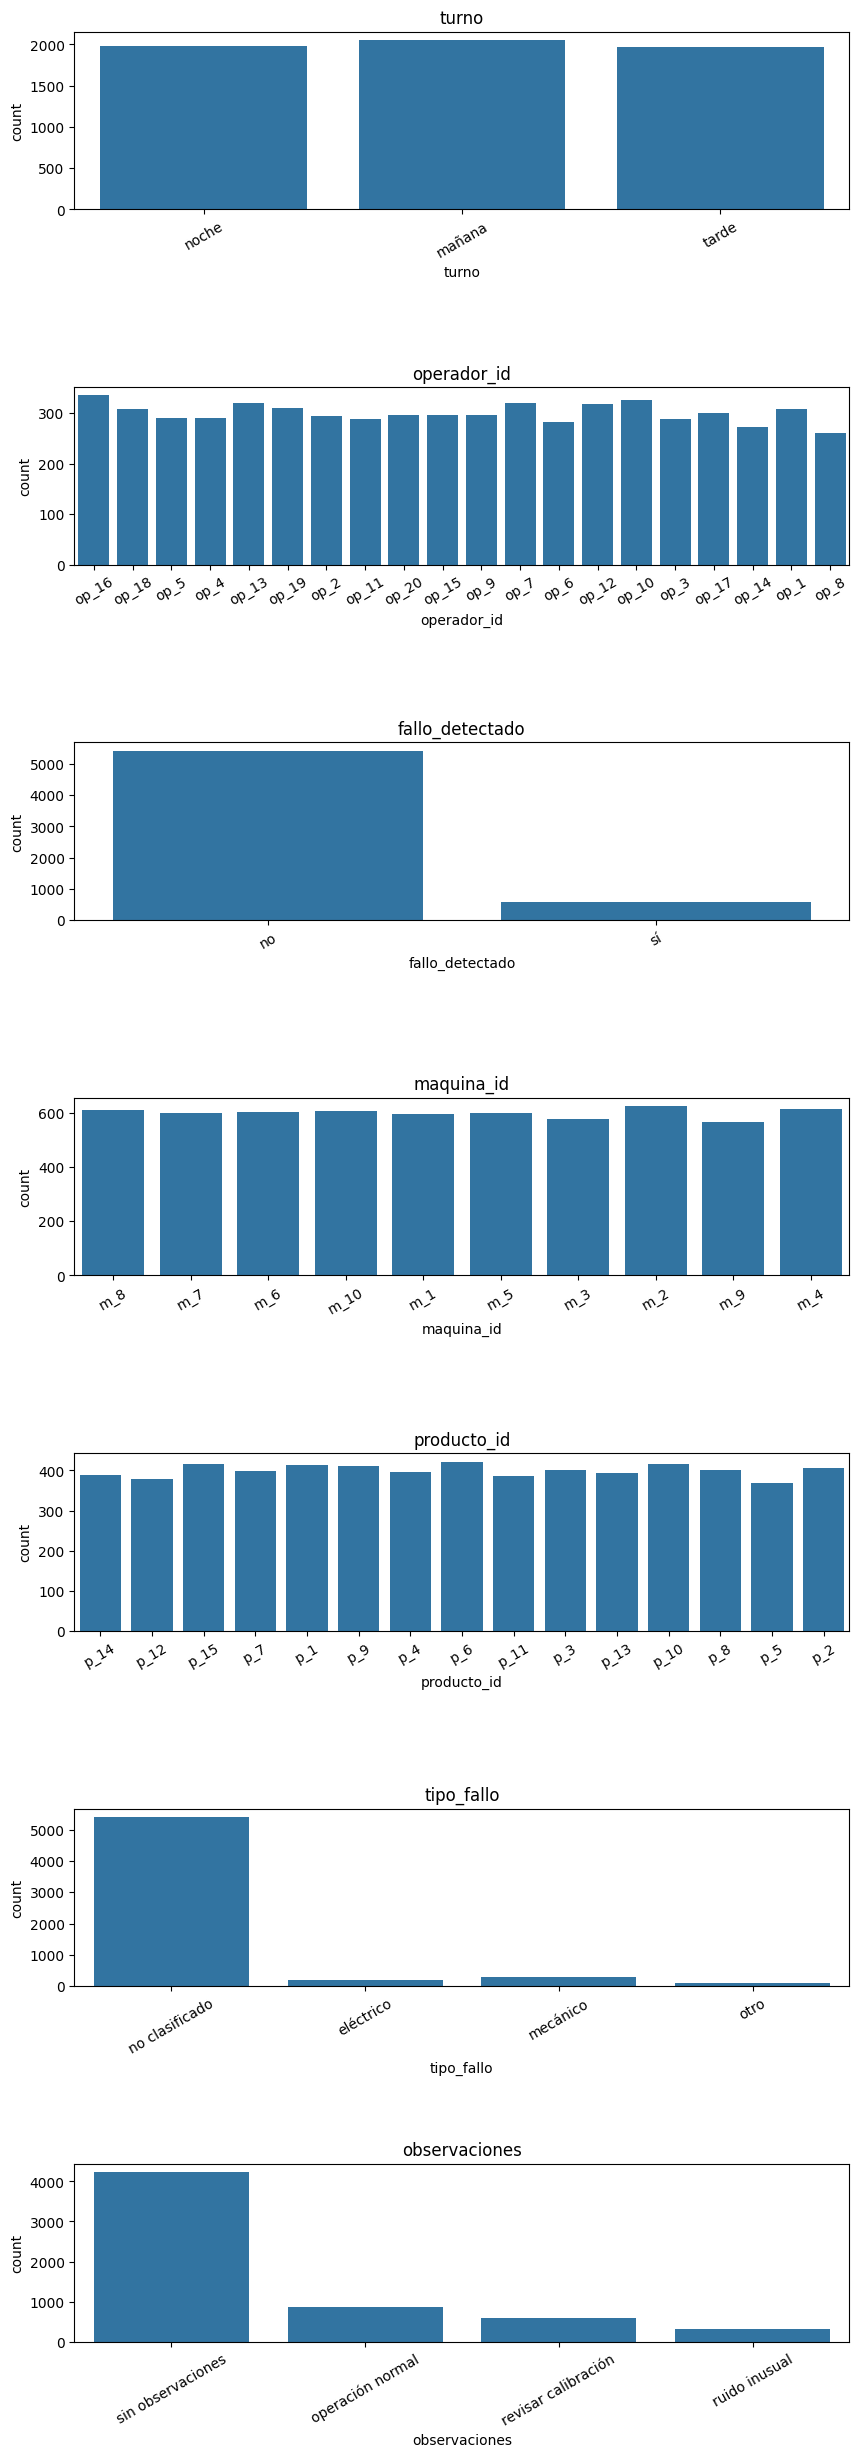

In [122]:
cols_string = ['turno', 'operador_id', 'fallo_detectado', 'maquina_id', 'producto_id', 'tipo_fallo', 'observaciones']

for column in dataSet.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_string:
        dataSet[column] = dataSet[column].str.lower()

# Generar las gráficas nuevamente
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_string):
    sns.countplot(x=col, data=dataSet, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)

No existen subniveles que puedan referirse al mismo concepto, todas las variables categóricas tienen subniveles únicos.

#Exportar el Dataset
El dataset está limpio, es momento de exportarlo

In [123]:
dataSet.to_csv("/content/drive/MyDrive/Hackaton/Dataset_Talento_limpio.csv", index=False)